# figures

Generating the figures used in <a href="">Marquez & Tissot (2022)</a> that demonstrate the concepts behind the `cosmo` software package. 

### Setup

In [1]:
cd ..
dsstartup;
global ISODATA

Welcome to the double spike toolbox.    John F. Rudge 2009-2022.
Default parameters are stored in the global variable ISODATA.
Type "global ISODATA" to access and set these parameters.


### Figure 1

Shows the composition of a natural material vs. that of a tracer/spike.

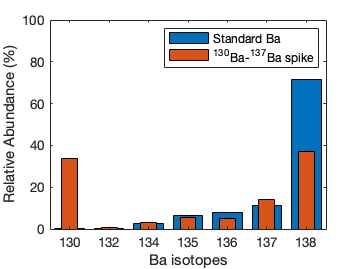

In [2]:
isotopes=ISODATA.Ba.isonum;
standard=ISODATA.Ba.standard.*100;
spike130=ISODATA.Ba.rawspike(1,:).*100;
spike137=ISODATA.Ba.rawspike(6,:).*100;
spike=(spike130.*0.9+spike137.*0.1);

set(gca,'yscale','log')
bar(categorical(isotopes),standard,0.75);
hold on
bar(categorical(isotopes),spike,0.4);
lgd = legend('Standard Ba','^{130}Ba-^{137}Ba spike');
ylim([0 100])
xlabel('Ba isotopes')
ylabel('Relative Abundance (%)')

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=2.8;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig1','epsc')

cd ..

### Figure 3

Demonstrates that some spike combinations, despite having the lower optimal error on $\alpha$, can be considered  less ideal/practical due to their sensitivity to under- and over-spiking.

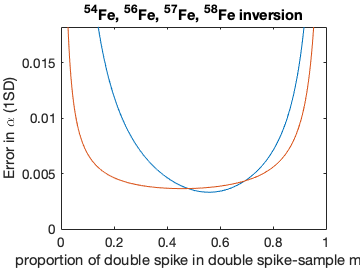

In [3]:
spike68=[0.001454 0.795704 0.003254 0.199588]; % Fe-56 (76%) + Fe-58 (24%)
spike78=[0.002543 0.105932 0.441296 0.450229]; % Fe-57 (47%) + Fe-58 (53%)

ISODATA.Fe.errormodel.type='fixed-sample';

errorcurve('Fe',spike68)
hold on
errorcurve('Fe',spike78)

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=2.8;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig3','epsc')

cd ..

### Figure 4

Demonstrates that the $\sigma_\alpha$ and robustness of a spike combination improve with higher spike purity.

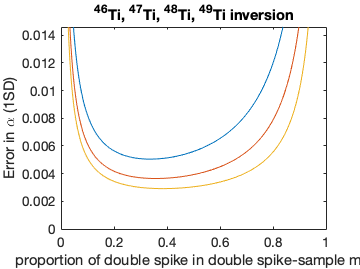

In [4]:
% Ti 47-49 spikes with varying purities
pure90=[0.03 0.45 0.03 0.45 0.03]; 
pure80=[0.06 0.40 0.06 0.40 0.06];
pure70=[0.10 0.35 0.10 0.35 0.10];

ISODATA.Ti.errormodel.type='fixed-sample';

isoinv=[46 47 48 49];

% Plotting
errorcurve('Ti',pure70,isoinv)
hold on
errorcurve('Ti',pure80,isoinv)
errorcurve('Ti',pure90,isoinv)
hold off

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=2.8;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig4','epsc')
cd ..

### Figure 5

Demonstrates the dependence of the final uncertainty (1SE) from multiple measurements on the voltage/integration, and in turn, the number of cycles assuming a fixed sample amount. 

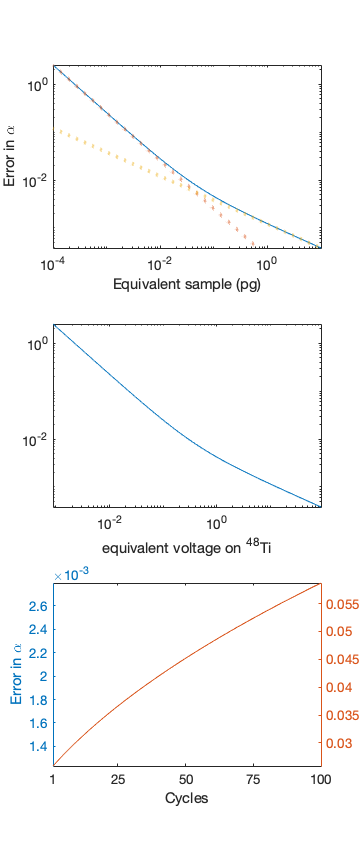

In [5]:
% Measurement parameters
eff=0.0008;
cycles=1;

% As recommended by the original DS Toolbox for a 47-49 spike
prop=0.429748;
isoinv = [46 47 48 49];
spike79 = [0.002837 0.47508 0.037276 0.480938 0.003869];
comp = spike79*prop+ISODATA.Ti.standard*(1-prop);

errvals1=[];
sample1=[];
voltage=[];
i=1;

for n=logspace(-4,1,1000)
    % Calculation setup
    shake('Ti',n,[eff eff],[cycles cycles]);
    ISODATA.Ti.errormodel.standard.a=zeros(1,ISODATA.Ti.nisos); % no error on standard
    ISODATA.Ti.errormodel.standard.b=zeros(1,ISODATA.Ti.nisos);
    ISODATA.Ti.errormodel.measured.intensity=ISODATA.Ti.errormodel.V100*eff/cycles; 
    
    %Stored Values
    voltage(i)=ISODATA.Ti.errormodel.measured.intensity*comp(3); % Voltage at Ti-48
    sample1(i)=n;
    errvals1(i)=errorestimate('Ti',prop,spike79,isoinv);
    i=i+1;
end

errvals2=[];
cycles=[];
j=1;

for n=linspace(1,100,100)
    % Calculation setup
    shake('Ti',1,[eff eff],[n n]);
    ISODATA.Ti.errormodel.standard.a=zeros(1,ISODATA.Ti.nisos);
    ISODATA.Ti.errormodel.standard.b=zeros(1,ISODATA.Ti.nisos);
    ISODATA.Ti.errormodel.measured.intensity=ISODATA.Ti.errormodel.V100*eff/n;
    
    cycles(j)=n;
    errvals2(j)=errorestimate('Ti',prop,spike79,isoinv)/sqrt(n);
    j=j+1;
end

% PLOTS

fig = figure;

subplot(3,1,1)

plot(sample1,errvals1);
set(gca,'XScale', 'log', 'YScale', 'log');
ax = gca;
hold(ax,'on')

% Johnson Noise and Counting Statistics Lines
b1=errvals1(1)*sample1(1)*eff;
b2=errvals1(end)*sqrt(sample1(end)*eff);
slope1 = plot(sample1,b1./(sample1*eff),'linewidth',2,'linestyle',':');
slope1.Color(4)=0.5;
slope2 = plot(sample1,b2./sqrt(sample1*eff),'linewidth',2,'linestyle',':');
slope2.Color(4)=0.5;

xlabel('Equivalent sample (pg)')
ylabel('Error in \alpha')
xlim(ax,[sample1(1) sample1(end)])
ylim(ax,[errvals1(end) errvals1(1)])
hold(ax,'off')

subplot(3,1,2)
% Secondary Axis with voltages
ax2=gca;
plot(voltage,errvals1)
set(ax2,'XScale', 'log', 'YScale', 'log')
xlim(ax2,[voltage(1) voltage(end)])
ylim(ax2,[errvals1(end) errvals1(1)])
xlabel('equivalent voltage on ^{48}Ti')
hold(ax2,'off')

subplot(3,1,3)

yyaxis left
plot(cycles,errvals2)
ylim([min(errvals2) max(errvals2)])
xlim([min(cycles) max(cycles)])
xticks([1 25 50 75 100])
xlabel('Cycles')
ylabel('Error in \alpha')

yyaxis right
errdeltavals=(1000*log(ISODATA.Ti.mass(3)/ISODATA.Ti.mass(2))).*errvals2;
plot(cycles,errdeltavals)
ylim([min(errdeltavals) max(errdeltavals)])

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=9;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig5','epsc')
cd ..

### Figure 6

Demonstrates cases where isotope measurement processed while assuming that the sample is related to a terrestrial standard via an exponential law results to systematic offsets in the calculated $\alpha$ during the DS inversion. 

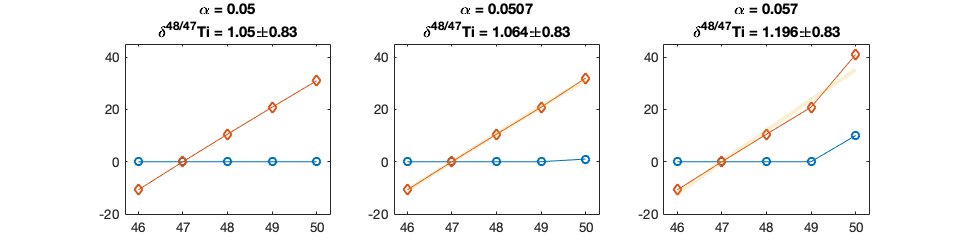

In [6]:
% Using the DS Toolbox built-in info
element = 'Ti';
rawdata = ISODATA.(element);

% Setup
shake('Ti',0.400,[eff eff],[cycles cycles]); % 400 pg Ti
ISODATA.Ti.errormodel.standard.a=zeros(1,rawdata.nisos);
ISODATA.Ti.errormodel.standard.b=zeros(1,rawdata.nisos);

% Some stuff needed for the calculation
AtomicNumberTi = rawdata.isonum;
IsotopeMassTi = rawdata.mass;
StandardCompositionTi = rawdata.standard;

isospikeTi = [47 49];
deltaTi = [48 47];
pair = [48 47];
pairwt = ISODATA.Ti.mass(ISODATA.Ti.isoindex(pair));
pairwtratTi = pairwt(1)/pairwt(2);

% Reference/denominator isotope should be the same for the inversion and internal normalization 
refTi = 47;
RefTiIndex = find(rawdata.isonum==refTi);

% Getting the optimal spike composition
[optspikeTi,optpropTi,opterrTi,optinvTi] = optimalspike('Ti','real');

% Target delta values
pairwtTi = IsotopeMassTi(rawdata.isoindex(deltaTi));
twosigmaTi = abs(opterrTi(1).*log(pairwtratTi).*1000.*2);

% 1a. Calculating the parts per ten thousand deviation of a standard.. from a standard; so zero
StandardRatiosTi = StandardCompositionTi./StandardCompositionTi(RefTiIndex);
ppttStandardTi = ((StandardRatiosTi-StandardRatiosTi)./StandardRatiosTi)*10000;

% 1b. Calculating the parts per ten thousand deviation of a fractionated sample
a=0.05; %alpha
FracRatiosTi = StandardRatiosTi.*((IsotopeMassTi./IsotopeMassTi(RefTiIndex)).^a);

ppttFracTi = ((FracRatiosTi-StandardRatiosTi)./StandardRatiosTi)*10000;

FracCompositionTi = FracRatiosTi./(sum(FracRatiosTi));

alphaTi1 = dsinversion('Ti',FracCompositionTi.*(1-optpropTi(1))+optpropTi(1).*optspikeTi(1,:),optspikeTi(1,:),optinvTi(1,:));

deltaTi1 = 1000*log(pairwtratTi)*abs(alphaTi1.alpha);

% 2a. Calculating the parts per ten thousand deviation of a fractionated sample with anomalies

eTi = [0 0 0 0 1];

AnomRatiosTi = ((eTi/10000).*StandardRatiosTi)+StandardRatiosTi; % These are ratios after internal norm.
AnomRatiosFracTi = AnomRatiosTi.*((IsotopeMassTi./IsotopeMassTi(RefTiIndex)).^a); % These are ratios prior to internal norm.
ppttAnomRatiosFracTi = ((AnomRatiosFracTi-StandardRatiosTi)./StandardRatiosTi)*10000; % epsilon w/o internal norm

AnomCompTi = AnomRatiosFracTi./(sum(AnomRatiosFracTi));
alphaTi2 = dsinversion('Ti',AnomCompTi.*(1-optpropTi(1))+optpropTi(1).*optspikeTi(1,:),optspikeTi(1,:),optinvTi(1,:));
deltaTi2 = 1000*log(pairwtratTi)*abs(alphaTi2.alpha);

% 2b. Projected alpha

ProjRatiosTi1 = StandardRatiosTi.*((IsotopeMassTi./IsotopeMassTi(RefTiIndex)).^alphaTi2.alpha);
ppttProjTi1 = ((ProjRatiosTi1-StandardRatiosTi)./StandardRatiosTi)*10000;

% 3a. Calculating the parts per ten thousand deviation of a fractionated sample with bigger (10x) anomalies

eTi10 = [0 0 0 0 10];

AnomRatiosTi2 = ((eTi10/10000).*StandardRatiosTi)+StandardRatiosTi;
AnomRatiosFracTi2 = AnomRatiosTi2.*((IsotopeMassTi./IsotopeMassTi(RefTiIndex)).^a);
ppttAnomRatiosFracTi2 = ((AnomRatiosFracTi2-StandardRatiosTi)./StandardRatiosTi)*10000;

AnomCompTi2 = AnomRatiosFracTi2./(sum(AnomRatiosFracTi2));
alphaTi3 = dsinversion('Ti',AnomCompTi2.*(1-optpropTi(1))+optpropTi(1).*optspikeTi(1,:),optspikeTi(1,:),optinvTi(1,:));
deltaTi3 = 1000*log(pairwtratTi)*abs(alphaTi3.alpha);

% 3b. Projected alpha

ProjRatiosTi2 = StandardRatiosTi.*((IsotopeMassTi./IsotopeMassTi(RefTiIndex)).^alphaTi3.alpha);
ppttProjTi2 = ((ProjRatiosTi2-StandardRatiosTi)./StandardRatiosTi)*10000;

%% PLOTS

figure(1)
subplot(1,3,1)
plot(AtomicNumberTi,ppttStandardTi,'o-');
hold on
plot(AtomicNumberTi,ppttFracTi,'d-');
title({['\alpha =',' ',num2str(abs(alphaTi1.alpha),3)],['\delta^{48/47}Ti =',' ',...
num2str(deltaTi1,4),'\pm',num2str(twosigmaTi,2)]})
ylim([-20 45])
xlim([45.7 50.3])
hold off

subplot(1,3,2)
plot(AtomicNumberTi,eTi,'o-');
hold on
plot(AtomicNumberTi,ppttAnomRatiosFracTi,'d-');
b1 = plot(AtomicNumberTi,-1.*ppttProjTi1,'linewidth',3);
b1.Color(4)=0.2;
%plot(AtomicNumberTi,-1.*ppttProjTi1p)
title({['\alpha =',' ',num2str(abs(alphaTi2.alpha),3)],['\delta^{48/47}Ti =',' ',...
num2str(deltaTi2,4),'\pm',num2str(twosigmaTi,2)]})
ylim([-20 45])
xlim([45.7 50.3])
hold off

subplot(1,3,3)
plot(AtomicNumberTi,eTi10,'o-');
hold on
plot(AtomicNumberTi,ppttAnomRatiosFracTi2,'d-');
b2 = plot(AtomicNumberTi,-1.*ppttProjTi2,'linewidth',3);
b2.Color(4)=0.2;
title({['\alpha =',' ',num2str(abs(alphaTi3.alpha),3)],['\delta^{48/47}Ti =',' ',...
num2str(deltaTi3,4),'\pm',num2str(twosigmaTi,2)]})
ylim([-20 45])
xlim([45.7 50.3])
hold off

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=10 ;y_width=2.5;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig6','epsc')
cd ..

### Figure 7

Demonstrates the difference between the $\textit{fixed-voltage}$ (*i.e.*, the default error model in the original DS Toolbox) vs. the recently-introduced $\textit{fixed-sample}$ error model, where the voltage coming from the sample is fixed, instead of the spike-sample mixture.

The total measured intensity is 13.7653
    0.4595    0.0243    0.4114    0.1047

    0.4744    0.0249    0.3952    0.1055



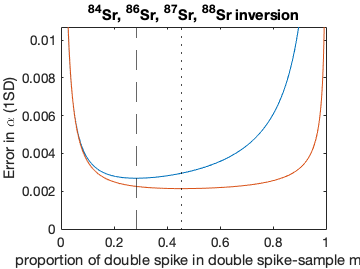

In [7]:
% Assume 100 pg of Sr for one cycle,  with 1% ionization efficiency

shake('Sr',0.100,[0.01 0.01],[1 1]);
ISODATA.Sr.errormodel.standard.a=zeros(1,ISODATA.Sr.nisos); % Assume no error on standard
ISODATA.Sr.errormodel.standard.b=zeros(1,ISODATA.Sr.nisos);
ISODATA.Sr.errormodel.measured.intensity=ISODATA.Sr.errormodel.V100*0.01;

disp(strcat("The total measured intensity is ", num2str(ISODATA.Sr.errormodel.measured.intensity)))

% Plot uncertainties with defaul 'fixed-voltage' error model
ISODATA.Sr.errormodel.measured.type='fixed-voltage';
[optspikeSr0,optpropSr0,opterrSr,optisoinvSr,optspikepropSr0] = optimalspike('Sr','real');
disp(optspikeSr0(1,:))

errorcurve('Sr',optspikeSr0(1,:))
hold on 
xline(optpropSr0(1),'--');

% Switch to 'fixed-sample' error model
ISODATA.Sr.errormodel.measured.type='fixed-sample';
[optspikeSr,optpropSr,opterrSr,optisoinvSr,optspikepropSr1] = optimalspike('Sr','real');
disp(optspikeSr(1,:))

errorcurve('Sr',optspikeSr(1,:))
xline(optpropSr(1),':black');
hold off

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=2.8;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig7','epsc')
cd ..

### Figure 8

Demonstrates that the respective uncertainty on the spiked and unspiked measurement are functions of the splitting, which is fraction of the sample allocated to the spiked measurement. 

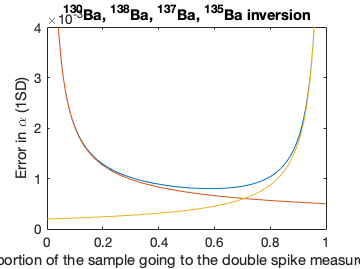

In [8]:
element='Ba'; % element of interest
sample=5; % total sample available; in nanograms (ng)
eff=[0.005 0.01]; % ionization efficiency for instruments used in the IC and ID meas., respectively
cycles=[20 20]; % number of cycles for IC and ID meas., respectively

R=[1e11 1e11 1e11 1e11 1e11 1e11 1e11; 
   1e11 1e11 1e11 1e11 1e11 1e11 1e11]; % resistor array for IC and ID meas., respectively
   R_reference=1e11; %reference resistance used for describing beam intensity.

T=319.15; % resistor temperature (K) = 46 deg.C
deltat=8; % integration time (secs.)

shake(element,sample,eff,cycles,R,R_reference,T,deltat)

prop=0.3;
spike=[0.09115 0.002403 0.008985 0.016012 0.01826 0.6359 0.227291]; % 130-137 spike
isoinv=[130 138 137 135];
INisos=[138 135];

errorcurve3(element,prop,spike,isoinv,INisos)
hold on

svals=linspace(0.001,0.999,1000);
errvals1=[];
errvals2=[];

for i=1:length(svals)
    ISODATA.Ba.errormodel.standard.a=zeros(1,ISODATA.Ba.nisos); % Assume no error on standard
    ISODATA.Ba.errormodel.standard.b=zeros(1,ISODATA.Ba.nisos);
    errvals1(i)=errorwsplit(element,svals(i),prop,spike,isoinv,INisos);
end

plot(svals,errvals1)
shake(element,sample,eff,cycles,R,R_reference,T,deltat)

for i=1:length(svals)
    ISODATA.Ba.errormodel.measured.a=zeros(1,ISODATA.Ba.nisos); % Assume no error on standard
    ISODATA.Ba.errormodel.measured.b=zeros(1,ISODATA.Ba.nisos);
    errvals2(i)=errorwsplit(element,svals(i),prop,spike,isoinv,INisos);
end
plot(svals,errvals2)
hold off

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=2.8;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig8','epsc')
cd ..

### Figure 9

Shows the sensitivity of the different spike combinations as recommended by the DS Toolbox's $'fixed-sample'$ error model. The cocktail.m function still assumes 1 integration at 10V of sample.

In [9]:
% Creating the cocktail list from the DS Toolbox using fixed-sample error model
dsstartup
global ISODATA
ISODATA.Ba.errormodel.measured.type='fixed-sample';
ISODATA.Ba.errormodel.measured.intensity=75;
cocktail('real','docs/cocktail0.csv',{'Ba'})

Welcome to the double spike toolbox.    John F. Rudge 2009-2022.
Default parameters are stored in the global variable ISODATA.
Type "global ISODATA" to access and set these parameters.
Writing to docs/cocktail0.csv
Ba
Output written to docs/cocktail0.csv


#### Figure 9a

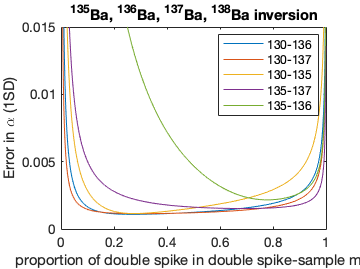

In [10]:
% Read/import csv as a table
Ba0 = readtable('docs/cocktail0.csv');
isos = {'Ba130','Ba132','Ba134','Ba135','Ba136','Ba137','Ba138'};

errorcurve('Ba',table2array(Ba0(1,isos)),[130 135 136 138])
hold on
errorcurve('Ba',table2array(Ba0(2,isos)),[130 135 137 138])
errorcurve('Ba',table2array(Ba0(3,isos)),[130 134 135 138])
errorcurve('Ba',table2array(Ba0(22,isos)),[134 135 137 138])
errorcurve('Ba',table2array(Ba0(102,isos)),[135 136 137 138])
ylim([0 0.015])
hold off
legend('130-136','130-137','130-135','135-137','135-136')

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=2.8;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig9a','epsc')
cd ..

#### Figure 9b

Here, we show the error curves for the spikes suggested by *cosmo*. 

First, we need to get the cosmo list of optimal spikes based on the following parameters:

1. **sample amount**: 1 ng
2. **cycles** : 60 (both spiked and unspiked)
3. **transmission efficiency**: 0.005 for unspiked, 0.01 for spiked

In [11]:
sample=1; % ng
cycles=60; % for both IC and ID
eff=[0.005 0.01]; % for IC and ID, respectively
R=[1e11 1e11 1e11 1e11 1e11 1e11 1e11; 
   1e11 1e11 1e11 1e11 1e11 1e11 1e11];
R_ref=1e11; % reference R 
T=300; % K
deltat=4.194; %

shake('Ba',sample,eff,[cycles cycles],R,R_ref,T,deltat);
cosmo('docs/cocktail1.csv',{'Ba'})

Writing to docs/cocktail1.csv
Ba

Solver stopped prematurely.

fmincon stopped because it exceeded the iteration limit,
options.MaxIterations = 4.000000e+02.



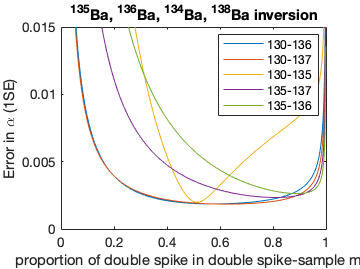

In [12]:
% Read/import csv as a table
Ba1 = readtable('docs/cocktail1.csv');
errorcurve4('Ba',table2array(Ba1(2,{'split'})),table2array(Ba1(2,isos)),[130 135 136 138],[135 138])

hold on

errorcurve4('Ba',table2array(Ba1(1,{'split'})),table2array(Ba1(1,isos)),[130 135 137 138],[135 138])
errorcurve4('Ba',table2array(Ba1(3,{'split'})),table2array(Ba1(3,isos)),[130 135 136 138],[135 138])
errorcurve4('Ba',table2array(Ba1(19,{'split'})),table2array(Ba1(19,isos)),[135 136 137 138],[136 138])
errorcurve4('Ba',table2array(Ba1(37,{'split'})),table2array(Ba1(37,isos)),[135 136 134 138],[134 138])
ylim([0 0.015])

hold off
legend('130-136','130-137','130-135','135-137','135-136')


cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=2.8;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig9b','epsc')
cd ..

### Figure 10

Demonstrates how the `errocurve3.m` function can be used to discern the proper splitting proportion for a sample-limited measurement. The internal normalization was set to be 134/136 when calculating the uncertainty on the presented $\varepsilon^{130}$ and $\varepsilon^{135}$ values. 


spike07 =

    0.1828    0.0045    0.0175    0.0312    0.0303    0.4523    0.2813



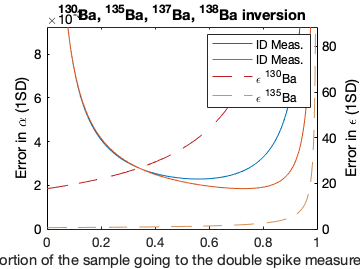

In [13]:
% Read/import csv as a table
Ba1 = readtable('docs/cocktail1.csv');

spike07=table2array(Ba1(1,isos))
prop07=table2array(Ba1(1,'spike'));
INisos=[135 138; 136 134];
epsisos=[130 135];

errorcurve3('Ba',table2array(Ba0(2,'spike')),table2array(Ba0(2,isos)),[130 135 137 138],INisos)
hold on
errorcurve3('Ba',prop07(1),spike07,[130 135 137 138],INisos,epsisos)
hold off

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=2.8;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
saveas(gcf,'fig10','epsc')
cd ..

In [14]:
shake('Ba',0.077,eff,[cycles cycles],R,R_ref,T,deltat); % 77 pg sample
cosmo('docs/cocktail2.csv',{'Ba'})

Writing to docs/cocktail2.csv
Ba

Solver stopped prematurely.

fmincon stopped because it exceeded the iteration limit,
options.MaxIterations = 4.000000e+02.


Solver stopped prematurely.

fmincon stopped because it exceeded the iteration limit,
options.MaxIterations = 4.000000e+02.


Solver stopped prematurely.

fmincon stopped because it exceeded the iteration limit,
options.MaxIterations = 4.000000e+02.


Solver stopped prematurely.

fmincon stopped because it exceeded the iteration limit,
options.MaxIterations = 4.000000e+02.



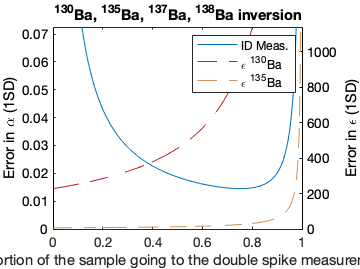

In [15]:
% Read/import csv as a table
Ba2 = readtable('docs/cocktail2.csv');

errorcurve3('Ba',table2array(Ba2(2,'spike')),table2array(Ba2(2,isos)),[130 135 137 138],INisos,epsisos)

cd figures
set(gcf, 'PaperUnits', 'inches');
x_width=3.75 ;y_width=2.8;
set(gcf, 'PaperPosition', [0 0 x_width y_width]);
%saveas(gcf,'fig10b','epsc')
cd ..